# Import modules and data (focusing on year 2008 only) 

In [150]:
import pandas as pd
import numpy as np
import gmplot
import folium
import json
import datetime
import matplotlib.pyplot as plt
import geopy.distance
import difflib

In [151]:
#importing data
df = pd.read_csv('2007.csv')
print("2008 data: done")
df_a = pd.read_csv('airports.csv')
df_c = pd.read_csv('carriers.csv',sep=';')

2008 data: done


# Analysis of the variables with all the companies

In [136]:
#count the number of flights per carrier
sizes = pd.DataFrame(df.groupby('UniqueCarrier').size().reset_index())
sizes.rename(columns={0:"size"})
sizes['number of flights'] = sizes[0]
sizes = sizes.drop(sizes.columns.values[1],axis=1) 

#add the carrier name using it's IATA code
def get_carrier_name(x):
    try:
        cn = list(df_c[df_c['IATA Carrier Code']==x]['Carrier Name'])[0]
    except:
        cn = None
    return cn 

sizes['Carrier Name'] = sizes['UniqueCarrier'].apply(lambda x: get_carrier_name(x))
sizes

,UniqueCarrier,number of flights,Carrier Name
0,9E,258851,Pinnacle Airlines
1,AA,633857,American Airlines
2,AQ,46360,Aloha
3,AS,160185,Alaska Airlines
4,B6,191450,JetBlue Airways
5,CO,323151,Continental Airlines
6,DL,475889,Delta Air Lines
7,EV,286234,Atlantic Southeast Airlines
8,F9,97760,Frontier
9,FL,263159,AirTran Airways


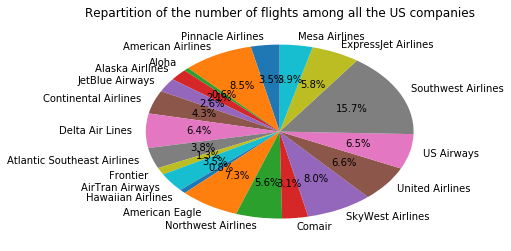

In [137]:
#Let's plot the chart pie of the total repartition of flights
plt.pie(sizes['number of flights'], labels=sizes['Carrier Name'], startangle=90, autopct='%.1f%%')
plt.title('Repartition of the number of flights among all the US companies')
plt.show()

We can see Southwest Airlines (code : WN) has the most important number of flights. 

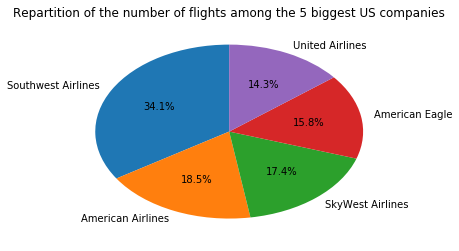

In [138]:
#Let's focus on the 5 most important companies for it to be more readable  
sizes = sizes.sort_values('number of flights',ascending = False)[0:5]
plt.pie(sizes['number of flights'], labels=sizes['Carrier Name'], startangle=90, autopct='%.1f%%')
plt.title('Repartition of the number of flights among the 5 biggest US companies')
plt.show()


Now let's focus on the average arrival delay per company

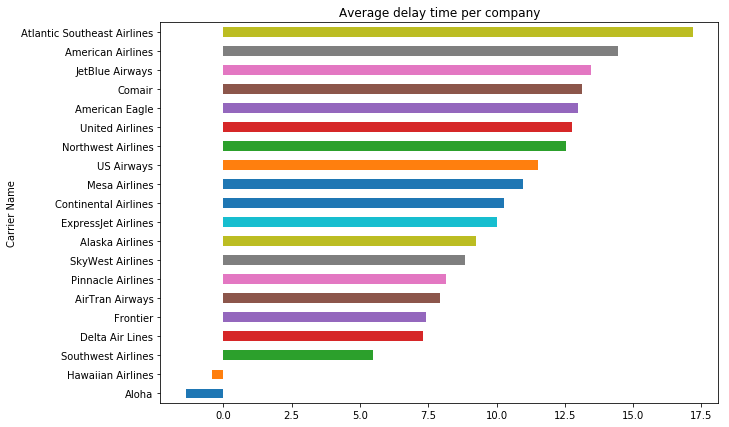

In [139]:
sizes = pd.DataFrame(df.groupby('UniqueCarrier')['ArrDelay'].mean())
sizes.reset_index(level=0, inplace=True)
sizes['Carrier Name'] = sizes['UniqueCarrier'].apply(lambda x: get_carrier_name(x))
sizes = sizes.sort_values('ArrDelay',ascending = True)
sizes.index = sizes['Carrier Name']
sizes['ArrDelay'].plot(kind='barh',title = 'Average delay time per company',figsize = (10,7))

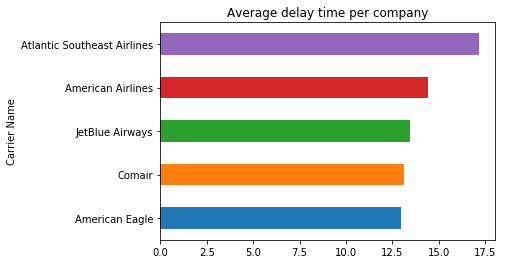

In [140]:
#the 5 with the most delays 
sizes['ArrDelay'][-5:].plot(kind='barh',title = 'Average delay time per company')

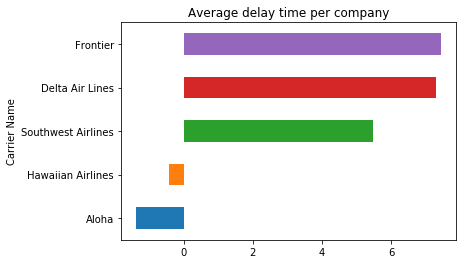

In [141]:
#the 5 with the less delays 
sizes['ArrDelay'][0:5].plot(kind='barh',title = 'Average delay time per company')

Number of airports where the company fly from

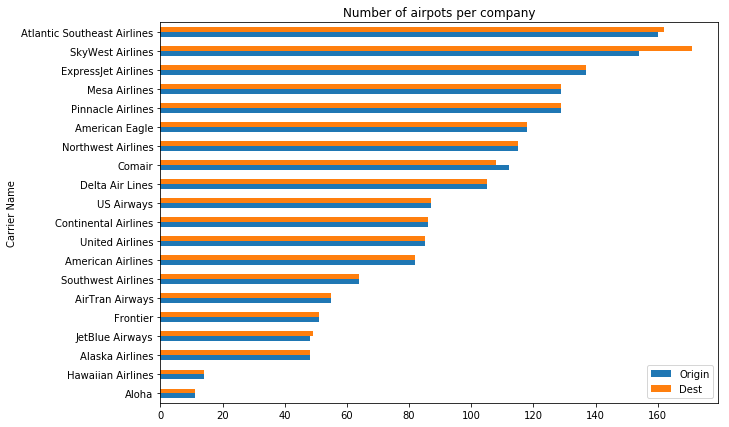

In [142]:
sizes = pd.DataFrame(df.groupby('UniqueCarrier')['Origin'].nunique())
sizes.reset_index(level=0, inplace=True)
sizes_bis =  pd.DataFrame(df.groupby('UniqueCarrier')['Dest'].nunique())
sizes_bis.reset_index(level=0, inplace=True)
sizes['Dest'] = sizes_bis['Dest']
sizes

sizes['Carrier Name'] = sizes['UniqueCarrier'].apply(lambda x: get_carrier_name(x))
sizes = sizes.sort_values('Origin',ascending = True)
sizes.index = sizes['Carrier Name']
sizes[['Origin','Dest']].plot(kind='barh',title = 'Number of airpots per company',figsize = (10,7))



Number of cancelled flights per company

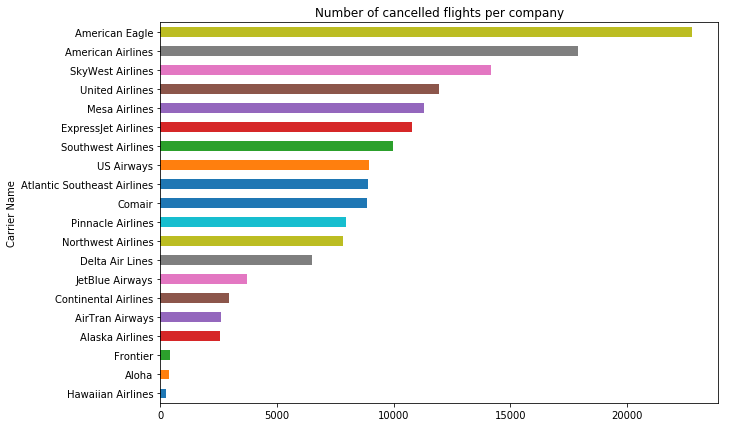

In [143]:
sizes = pd.DataFrame(df.groupby('UniqueCarrier')['Cancelled'].sum())
sizes.reset_index(level=0, inplace=True)
sizes['Carrier Name'] = sizes['UniqueCarrier'].apply(lambda x: get_carrier_name(x))
sizes = sizes.sort_values('Cancelled',ascending = True)
sizes.index = sizes['Carrier Name']
sizes['Cancelled'].plot(kind='barh',title = 'Number of cancelled flights per company',figsize = (10,7))

Cancelation rate per company

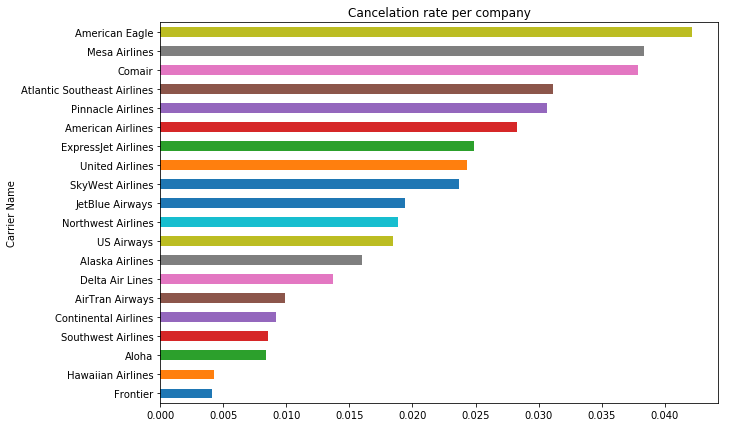

In [144]:
sizes = pd.DataFrame(df.groupby('UniqueCarrier')['Cancelled'].mean())
sizes.reset_index(level=0, inplace=True)
sizes['Carrier Name'] = sizes['UniqueCarrier'].apply(lambda x: get_carrier_name(x))
sizes = sizes.sort_values('Cancelled',ascending = True)
sizes.index = sizes['Carrier Name']
sizes['Cancelled'].plot(kind='barh',title = 'Cancelation rate per company',figsize = (10,7))

Plot of the number of cancelled and not cancelled fligths 

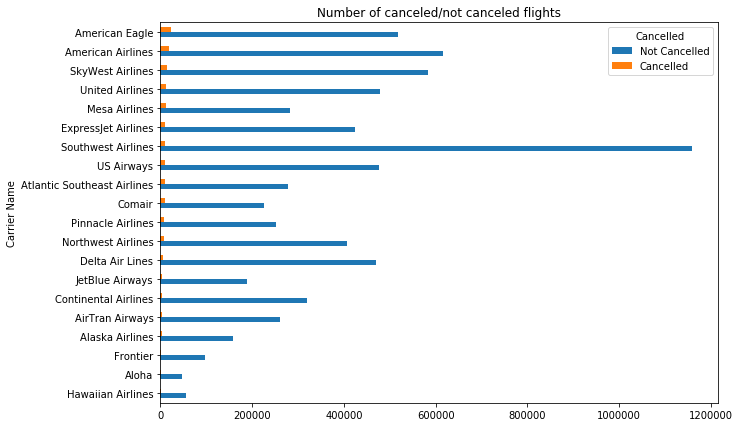

In [145]:
sizes = df.groupby(['UniqueCarrier','Cancelled']).size().unstack()
sizes.reset_index(level=0, inplace=True)
sizes['Carrier Name'] = sizes['UniqueCarrier'].apply(lambda x: get_carrier_name(x))
sizes = sizes.sort_values(1,ascending = True)
sizes['Not Cancelled'] = sizes[0]
sizes['Cancelled'] = sizes[1]
sizes.index = sizes['Carrier Name']
sizes[['Not Cancelled','Cancelled']].plot(kind='barh',title = 'Number of canceled/not canceled flights',figsize = (10,7))


Causes of delay per companies


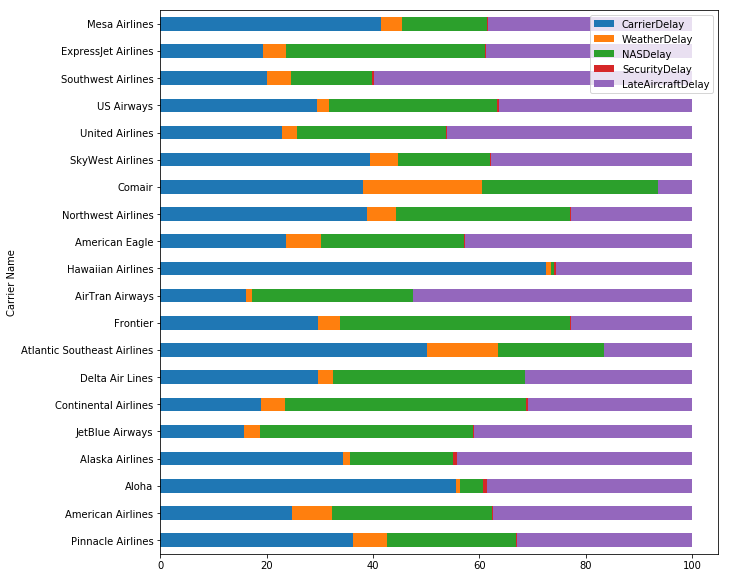

In [146]:
sizes = pd.DataFrame(df.groupby('UniqueCarrier')[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].sum())
sizes.reset_index(level=0, inplace=True)
sizes['Carrier Name'] = sizes['UniqueCarrier'].apply(lambda x: get_carrier_name(x))
sizes['total_delay'] = sizes['CarrierDelay'] + sizes['WeatherDelay'] + sizes['NASDelay'] + sizes['SecurityDelay'] + sizes['LateAircraftDelay']
sizes['CarrierDelay'] = sizes['CarrierDelay']/sizes['total_delay']*100
sizes['WeatherDelay'] = sizes['WeatherDelay']/sizes['total_delay']*100
sizes['NASDelay'] = sizes['NASDelay']/sizes['total_delay']*100
sizes['SecurityDelay'] = sizes['SecurityDelay']/sizes['total_delay']*100
sizes['LateAircraftDelay'] = sizes['LateAircraftDelay']/sizes['total_delay']*100
sizes.index = sizes['Carrier Name']
sizes[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].plot(kind='barh', stacked=True,figsize=(10,10))

# Focusing on WN (Southwest Airlines)

In [152]:
df = df[df['UniqueCarrier'] == 'WN']
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


Delay per months

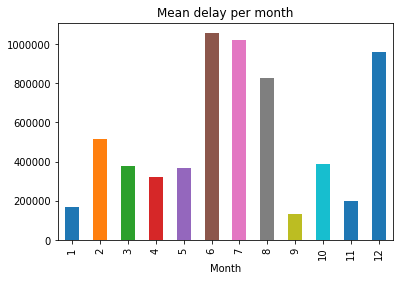

In [148]:
#sum of delay
sizes = pd.DataFrame(df.groupby(['Month'])['ArrDelay'].sum())
sizes.reset_index(level=0, inplace=True)
sizes.columns = ['Month','Sum of delay']
sizes

sizes.index = sizes['Month']
sizes['Sum of delay'].plot(kind = 'bar',title = 'Mean delay per month')

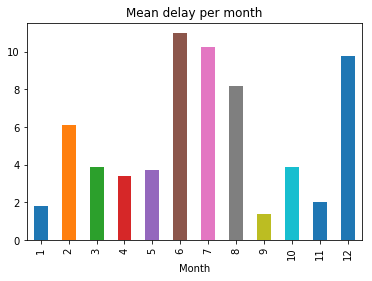

In [149]:
#destination with most delays (mean of the delay)
sizes = pd.DataFrame(df.groupby(['Month'])['ArrDelay'].mean())
sizes.reset_index(level=0, inplace=True)
sizes.columns = ['Month','Mean delay']
sizes


sizes.index = sizes['Month']
sizes['Mean delay'].plot(kind = 'bar',title = 'Mean delay per month')

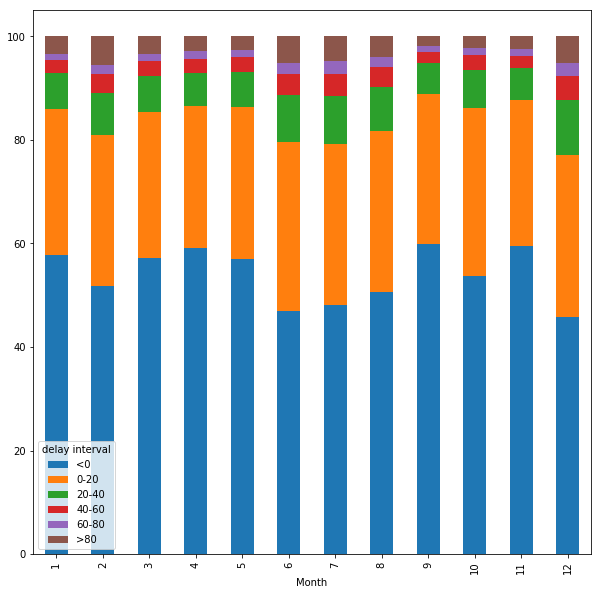

In [127]:
#delay interval per month
def time_interval(x):
    if x<0:
        return '<0'
    elif x<20:
        return '0-20'
    elif x<40:
        return '20-40'
    elif x<60:
        return '40-60'
    elif x<80:
        return '60-80'
    else:
        return '>80'
    
df['delay interval']= df['ArrDelay'].apply(lambda x: time_interval(x))
df.head()


sizes = df.groupby(['Month', 'delay interval']).size().unstack()
sizes['sum'] = sizes['0-20']+sizes['20-40']+sizes['40-60']+sizes['60-80']+sizes['<0']+sizes['>80']
sizes['0-20'] = sizes['0-20']/sizes['sum']*100
sizes['20-40'] = sizes['20-40']/sizes['sum']*100
sizes['40-60'] = sizes['40-60']/sizes['sum']*100
sizes['60-80'] = sizes['60-80']/sizes['sum']*100
sizes['<0'] = sizes['<0']/sizes['sum']*100
sizes['>80'] = sizes['>80']/sizes['sum']*100
sizes


sizes[['<0','0-20','20-40','40-60','60-80','>80']].plot(kind='bar', stacked=True,figsize=(10,10))

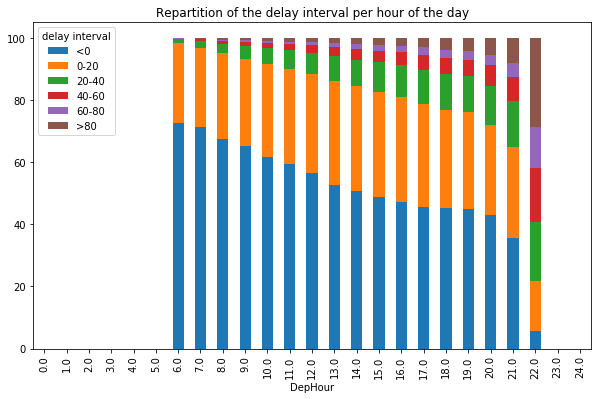

In [128]:
#Repartition of the delay interval per departure hour
def get_hour(x):
    try:
        h = int(x/100)
    except:
        h = np.nan 
    return h 
df['DepHour'] = df['DepTime'].apply(lambda x: get_hour(x))
sizes = df.groupby(['DepHour', 'delay interval']).size().unstack()
sizes['sum'] = sizes['0-20']+sizes['20-40']+sizes['40-60']+sizes['60-80']+sizes['<0']+sizes['>80']
sizes['0-20'] = sizes['0-20']/sizes['sum']*100
sizes['20-40'] = sizes['20-40']/sizes['sum']*100
sizes['40-60'] = sizes['40-60']/sizes['sum']*100
sizes['60-80'] = sizes['60-80']/sizes['sum']*100
sizes['<0'] = sizes['<0']/sizes['sum']*100
sizes['>80'] = sizes['>80']/sizes['sum']*100
sizes


sizes[['<0','0-20','20-40','40-60','60-80','>80']].plot(kind='bar', stacked=True,figsize=(10,6),title = 'Repartition of the delay interval per hour of the day')

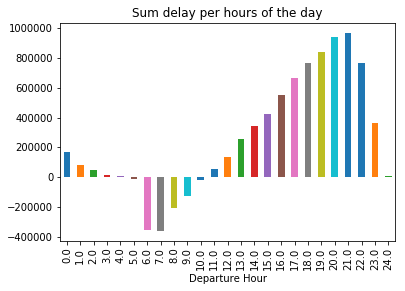

In [129]:
sizes = pd.DataFrame(df.groupby(['DepHour'])['ArrDelay'].sum())
sizes.reset_index(level=0, inplace=True)
sizes.columns = ['Departure Hour','Sum of delay']
sizes


sizes.index = sizes['Departure Hour']
sizes['Sum of delay'].plot(kind = 'bar',title = 'Sum delay per hours of the day')

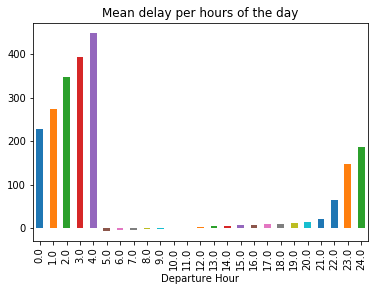

In [130]:
sizes = pd.DataFrame(df.groupby(['DepHour'])['ArrDelay'].mean())
sizes.reset_index(level=0, inplace=True)
sizes.columns = ['Departure Hour','Mean delay']
sizes


sizes.index = sizes['Departure Hour']
sizes['Mean delay'].plot(kind = 'bar',title = 'Mean delay per hours of the day')

Most used airports (Origin)

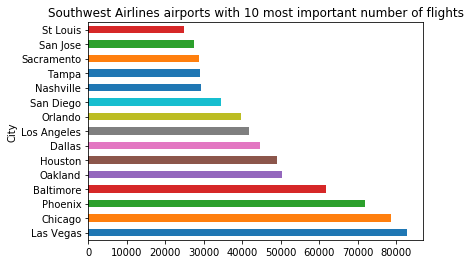

In [132]:
#histogram of the top n airports 
def get_city_name(x):
    try:
        a = list(df_a[df_a['iata']==x]['city'])[0]
    except :
        a = None
    return a

n = 15

sizes = pd.DataFrame(df.groupby('Origin')['Year'].count())
sizes.reset_index(level=0, inplace=True)
sizes.columns = ['Origin','Number of flights']
sizes = sizes.sort_values('Number of flights',ascending = False)[0:15]
sizes['City'] = sizes['Origin'].apply(lambda x: get_city_name(x))
sizes.index = sizes['City']
sizes['Number of flights'].plot(kind = 'barh',title = 'Southwest Airlines airports with 10 most important number of flights')

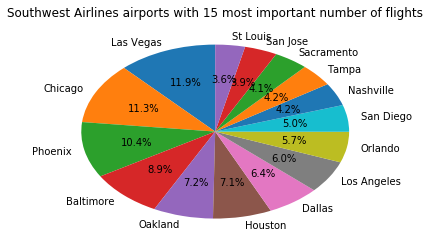

In [98]:
#pie chart
plt.pie(sizes['Number of flights'], labels=sizes['City'], startangle=90, autopct='%.1f%%')
plt.title('Southwest Airlines airports with '+str(n)+' most important number of flights')
plt.show()

In [99]:
#mapping 
import folium

def get_lat(x):
    try:
        a = list(df_a[df_a['iata']==x]['lat'])[0]
    except :
        a = None
    return a

def get_lon(x):
    try:
        a = list(df_a[df_a['iata']==x]['long'])[0]
    except :
        a = None
    return a

sizes['City'] = sizes.index
sizes.index = range(0,n)
sizes['lat'] = sizes['Origin'].apply(lambda x: get_lat(x))
sizes['lon'] = sizes['Origin'].apply(lambda x: get_lon(x))

def get_size(x):
    if x>50000:
        return 0
    elif x>30000:
        return 1
    else:
        return 2
    
    
sizes['cluster_n'] = sizes['Number of flights'].apply(lambda x: get_size(x))

In [100]:
#folium map
m = folium.Map(location=[40.8075355, -90.9625727],zoom_start=4)
colors = ['red','orange','green']
for k in range(len(sizes)):
    folium.Marker([sizes['lat'].iloc[k],sizes['lon'].iloc[k]],icon=folium.Icon(color=colors[sizes['cluster_n'].iloc[k]])).add_to(m)
m


Airports who have the most delay (number of minutes)

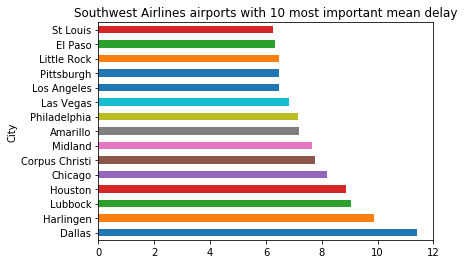

In [101]:
#histogram of the top n airports mean delay 
sizes = pd.DataFrame(df.groupby('Origin')['ArrDelay'].mean())
sizes.reset_index(level=0, inplace=True)
sizes.columns = ['Origin','Mean delay']
sizes = sizes.sort_values('Mean delay',ascending = False)[0:15]
sizes['City'] = sizes['Origin'].apply(lambda x: get_city_name(x))
sizes.index = sizes['City']
sizes['Mean delay'].plot(kind = 'barh',title = 'Southwest Airlines airports with 10 most important mean delay')

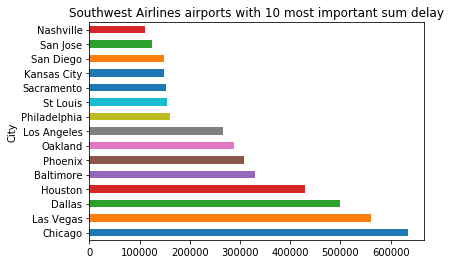

In [102]:
#histogram of the top n airports sum of delay 
sizes = pd.DataFrame(df.groupby('Origin')['ArrDelay'].sum())
sizes.reset_index(level=0, inplace=True)
sizes.columns = ['Origin','Sum of delay']
sizes = sizes.sort_values('Sum of delay',ascending = False)[0:n]
sizes['City'] = sizes['Origin'].apply(lambda x: get_city_name(x))
sizes.index = sizes['City']
sizes['Sum of delay'].plot(kind = 'barh',title = 'Southwest Airlines airports with 10 most important sum delay')

# Focusing on WN and LAS

In [153]:
print(df.shape)
df = df[df['Origin']=='LAS']
print(df.shape)

(1168871, 29)
(82859, 29)


In [104]:
#most commun destination from LAS
n = 10

sizes = pd.DataFrame(df.groupby(['Dest']).size())
sizes.reset_index(level=0, inplace=True)
sizes.columns = ['Destination','Number of flights']
sizes = sizes.sort_values('Number of flights',ascending = False)[0:n]
sizes['City'] = sizes['Destination'].apply(lambda x: get_city_name(x))
sizes.index = sizes['City']
sizes['lat'] = sizes['Destination'].apply(lambda x: get_lat(x))
sizes['lon'] = sizes['Destination'].apply(lambda x: get_lon(x))
sizes


,Destination,Number of flights,City,lat,lon
City,,,,,
Phoenix,PHX,6567,Phoenix,33.434167,-112.008056
Oakland,OAK,4988,Oakland,37.721291,-122.220717
Los Angeles,LAX,4950,Los Angeles,33.942536,-118.408074
San Diego,SAN,4936,San Diego,32.733556,-117.189657
Burbank,BUR,4633,Burbank,34.200619,-118.358497
Reno,RNO,4504,Reno,39.498576,-119.768065
Chicago,MDW,4141,Chicago,41.785983,-87.752424
Ontario,ONT,3527,Ontario,34.056000,-117.601194
San Jose,SJC,3047,San Jose,37.361862,-121.929009


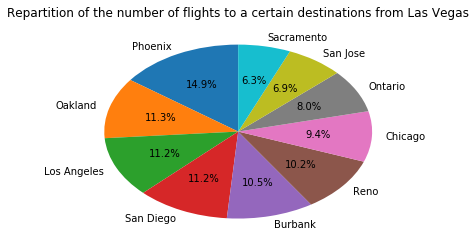

In [30]:
#pie graph
plt.pie(sizes['Number of flights'], labels=sizes['City'], startangle=90, autopct='%.1f%%')
plt.title('Repartition of the number of flights to a certain destinations from Las Vegas')
plt.show()


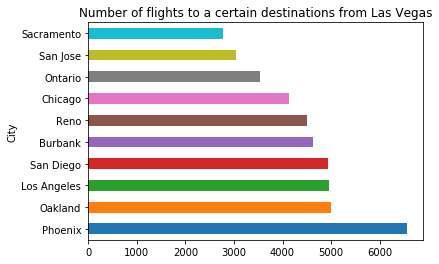

In [31]:
#barplot
sizes['Number of flights'].plot(kind = 'barh',title = 'Number of flights to a certain destinations from Las Vegas')

In [32]:
sizes

,Destination,Number of flights,City,lat,lon
City,,,,,
Phoenix,PHX,6567,Phoenix,33.434167,-112.008056
Oakland,OAK,4988,Oakland,37.721291,-122.220717
Los Angeles,LAX,4950,Los Angeles,33.942536,-118.408074
San Diego,SAN,4936,San Diego,32.733556,-117.189657
Burbank,BUR,4633,Burbank,34.200619,-118.358497
Reno,RNO,4504,Reno,39.498576,-119.768065
Chicago,MDW,4141,Chicago,41.785983,-87.752424
Ontario,ONT,3527,Ontario,34.056000,-117.601194
San Jose,SJC,3047,San Jose,37.361862,-121.929009


In [33]:
#map 
m = folium.Map(location=[40.8075355, -103.9625727],zoom_start=4.8)
p_las = [get_lat('LAS'),get_lon('LAS')]
folium.Marker(location = p_las,popup = 'Las Vegas', icon=folium.Icon(color='red')).add_to(m)

for k in range(0,len(sizes)):
    p_k = [sizes['lat'].iloc[k],sizes['lon'].iloc[k]]
    folium.Marker(location = p_k,popup =sizes['City'].iloc[k] ,icon=folium.Icon(color='orange')).add_to(m)
    folium.PolyLine(locations=[p_las, p_k], color='blue').add_to(m)
m
 

In [34]:
#destination with most delays (sum of the delay)
n = 10

sizes = pd.DataFrame(df.groupby(['Dest'])['ArrDelay'].sum())
sizes.reset_index(level=0, inplace=True)
sizes.columns = ['Destination','Sum of delay']
sizes = sizes.sort_values('Sum of delay',ascending = False)[0:n]
sizes['City'] = sizes['Destination'].apply(lambda x: get_city_name(x))
sizes.index = sizes['City']
sizes['lat'] = sizes['Destination'].apply(lambda x: get_lat(x))
sizes['lon'] = sizes['Destination'].apply(lambda x: get_lon(x))
sizes



,Destination,Sum of delay,City,lat,lon
City,,,,,
Burbank,BUR,45202.0,Burbank,34.200619,-118.358497
Phoenix,PHX,42704.0,Phoenix,33.434167,-112.008056
Los Angeles,LAX,41322.0,Los Angeles,33.942536,-118.408074
Oakland,OAK,33586.0,Oakland,37.721291,-122.220717
Ontario,ONT,33281.0,Ontario,34.056000,-117.601194
San Diego,SAN,32383.0,San Diego,32.733556,-117.189657
Reno,RNO,30636.0,Reno,39.498576,-119.768065
Salt Lake City,SLC,25941.0,Salt Lake City,40.788388,-111.977773
Sacramento,SMF,24340.0,Sacramento,38.695422,-121.590767


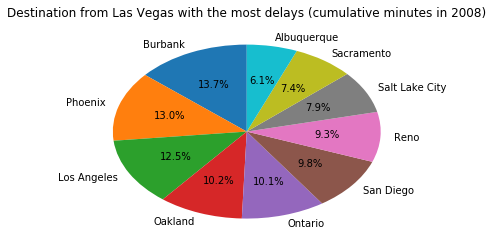

In [35]:
#pie graph
plt.pie(sizes['Sum of delay'], labels=sizes['City'], startangle=90, autopct='%.1f%%')
plt.title('Destination from Las Vegas with the most delays (cumulative minutes in 2008)')
plt.show()

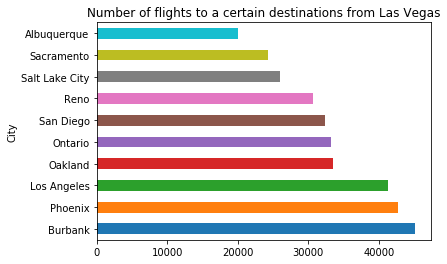

In [36]:
#barplot
sizes['Sum of delay'].plot(kind = 'barh',title = 'Number of flights to a certain destinations from Las Vegas')

In [37]:
#map 
m = folium.Map(location=[36.8075355, -112.9625727],zoom_start=5.5)
p_las = [get_lat('LAS'),get_lon('LAS')]
folium.Marker(location = p_las,popup = 'Las Vegas', icon=folium.Icon(color='red')).add_to(m)

for k in range(0,len(sizes)):
    p_k = [sizes['lat'].iloc[k],sizes['lon'].iloc[k]]
    folium.Marker(location = p_k,popup =sizes['City'].iloc[k] ,icon=folium.Icon(color='orange')).add_to(m)
    folium.PolyLine(locations=[p_las, p_k], color='blue').add_to(m)
m
 

repartition of delay within months

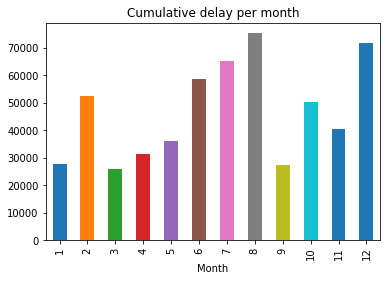

In [38]:
#destination with most delays (sum of the delay)
sizes = pd.DataFrame(df.groupby(['Month'])['ArrDelay'].sum())
sizes.reset_index(level=0, inplace=True)
sizes.columns = ['Month','Sum of delay']
sizes



sizes.index = sizes['Month']
sizes['Sum of delay'].plot(kind = 'bar',title = 'Cumulative delay per month')

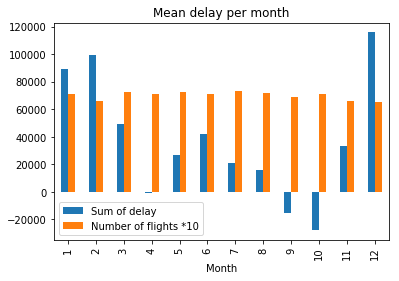

In [264]:
#plot sum of delay and number of fligths 
sizes['Number of flights *10'] = pd.DataFrame(df.groupby(['Month'])['ArrDelay'].count())['ArrDelay']*10
sizes[['Sum of delay','Number of flights *10']].plot(kind = 'bar',title = 'Mean delay per month')

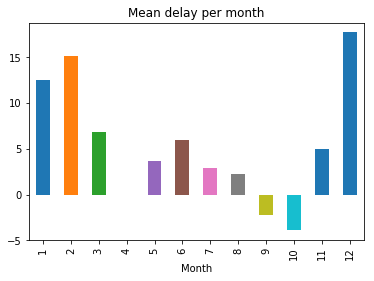

In [265]:
#destination with most delays (mean of the delay)
sizes = pd.DataFrame(df.groupby(['Month'])['ArrDelay'].mean())
sizes.reset_index(level=0, inplace=True)
sizes.columns = ['Month','Mean delay']
sizes


sizes.index = sizes['Month']
sizes['Mean delay'].plot(kind = 'bar',title = 'Mean delay per month')

2004.csv             output_20_1.png      output_49_1.png
2005.csv             output_22_1.png      output_52_1.png
2006.csv             output_26_1.png      output_53_1.png
2007.csv             output_27_1.png      output_54_1.png
2008.csv             output_28_1.png      output_55_1.png
Projet-BA.R          output_29_1.png      output_57_1.png
airports.csv         output_30_1.png      output_58_1.png
carriers.csv         output_31_1.png      output_60_1.png
notebook.tex         output_33_1.png      output_61_1.png
output_10_1.png      output_34_0.png      output_62_2.png
output_11_1.png      output_38_1.png      output_63_1.png
output_12_1.png      output_39_1.png      output_64_1.png
output_14_1.png      output_43_0.png      output_6_0.png
output_16_1.png      output_44_1.png      output_8_0.png
output_18_1.png      output_48_0.png      project_BA_viz.ipynb


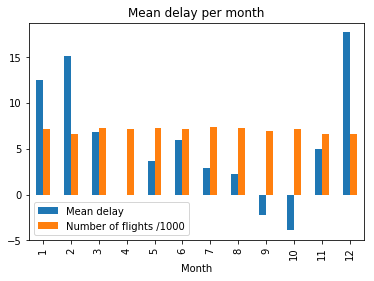

In [266]:
#plot sum of delay and number of fligths 
sizes['Number of flights /1000'] = pd.DataFrame(df.groupby(['Month'])['ArrDelay'].count())['ArrDelay']/1000
sizes[['Mean delay','Number of flights /1000']].plot(kind = 'bar',title = 'Mean delay per month')

Delay per weekday

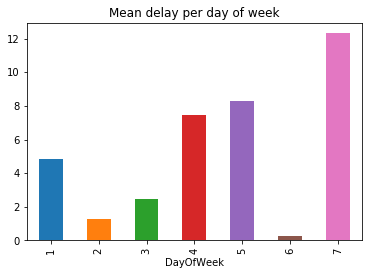

In [267]:
#plot sum of delay and number of fligths 
#destination with most delays (mean of the delay)
sizes = pd.DataFrame(df.groupby(['DayOfWeek'])['ArrDelay'].mean())
sizes.reset_index(level=0, inplace=True)
sizes.columns = ['DayOfWeek','Mean delay']
sizes


sizes.index = sizes['DayOfWeek']
sizes['Mean delay'].plot(kind = 'bar',title = 'Mean delay per day of week')


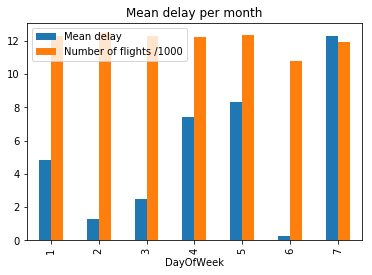

In [268]:
sizes['Number of flights /1000'] = pd.DataFrame(df.groupby(['DayOfWeek'])['ArrDelay'].count())['ArrDelay']/1000
sizes[['Mean delay','Number of flights /1000']].plot(kind = 'bar',title = 'Mean delay per month')

delay time interval per month

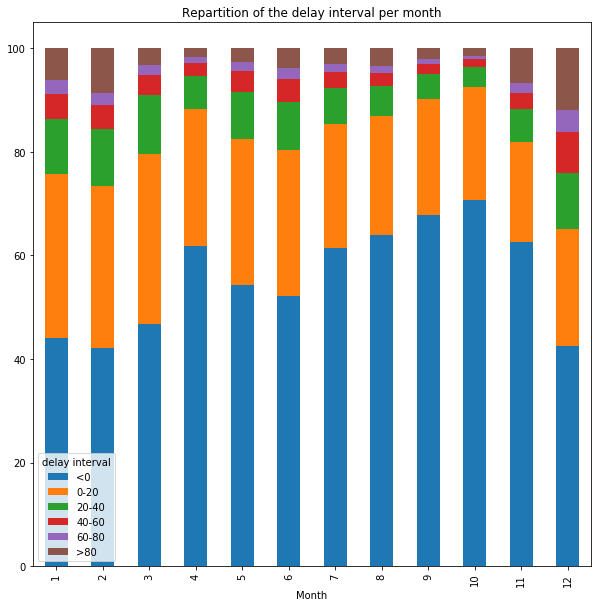

In [269]:
sizes = df.groupby(['Month', 'delay interval']).size().unstack()
sizes['sum'] = sizes['0-20']+sizes['20-40']+sizes['40-60']+sizes['60-80']+sizes['<0']+sizes['>80']
sizes['0-20'] = sizes['0-20']/sizes['sum']*100
sizes['20-40'] = sizes['20-40']/sizes['sum']*100
sizes['40-60'] = sizes['40-60']/sizes['sum']*100
sizes['60-80'] = sizes['60-80']/sizes['sum']*100
sizes['<0'] = sizes['<0']/sizes['sum']*100
sizes['>80'] = sizes['>80']/sizes['sum']*100
sizes


sizes[['<0','0-20','20-40','40-60','60-80','>80']].plot(kind='bar', stacked=True,figsize=(10,10),title = 'Repartition of the delay interval per month')

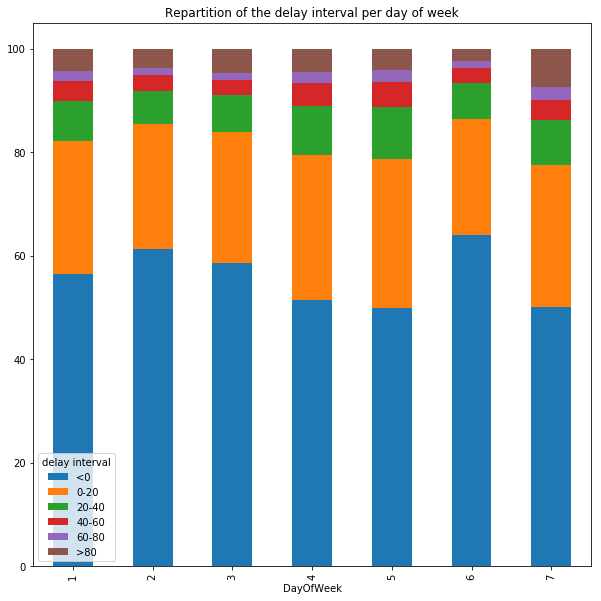

In [270]:
#Repartition of the delay interval per day of week
sizes = df.groupby(['DayOfWeek', 'delay interval']).size().unstack()
sizes['sum'] = sizes['0-20']+sizes['20-40']+sizes['40-60']+sizes['60-80']+sizes['<0']+sizes['>80']
sizes['0-20'] = sizes['0-20']/sizes['sum']*100
sizes['20-40'] = sizes['20-40']/sizes['sum']*100
sizes['40-60'] = sizes['40-60']/sizes['sum']*100
sizes['60-80'] = sizes['60-80']/sizes['sum']*100
sizes['<0'] = sizes['<0']/sizes['sum']*100
sizes['>80'] = sizes['>80']/sizes['sum']*100
sizes


sizes[['<0','0-20','20-40','40-60','60-80','>80']].plot(kind='bar', stacked=True,figsize=(10,10),title = 'Repartition of the delay interval per day of week')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


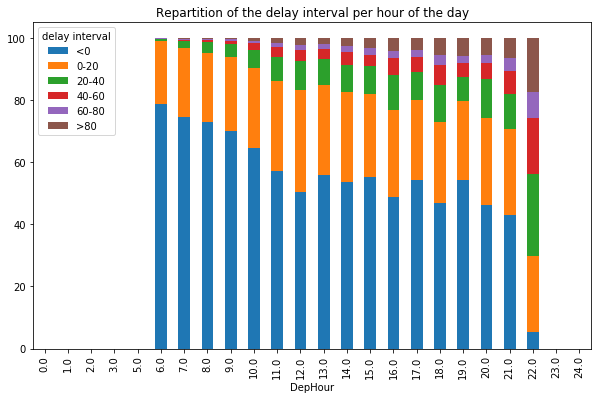

In [271]:
#Repartition of the delay interval per departure hour
def get_hour(x):
    try:
        h = int(x/100)
    except:
        h = np.nan 
    return h 

df['DepHour'] = df['DepTime'].apply(lambda x: get_hour(x))

sizes = df.groupby(['DepHour', 'delay interval']).size().unstack()
sizes['sum'] = sizes['0-20']+sizes['20-40']+sizes['40-60']+sizes['60-80']+sizes['<0']+sizes['>80']
sizes['0-20'] = sizes['0-20']/sizes['sum']*100
sizes['20-40'] = sizes['20-40']/sizes['sum']*100
sizes['40-60'] = sizes['40-60']/sizes['sum']*100
sizes['60-80'] = sizes['60-80']/sizes['sum']*100
sizes['<0'] = sizes['<0']/sizes['sum']*100
sizes['>80'] = sizes['>80']/sizes['sum']*100
sizes


sizes[['<0','0-20','20-40','40-60','60-80','>80']].plot(kind='bar', stacked=True,figsize=(10,6),title = 'Repartition of the delay interval per hour of the day')

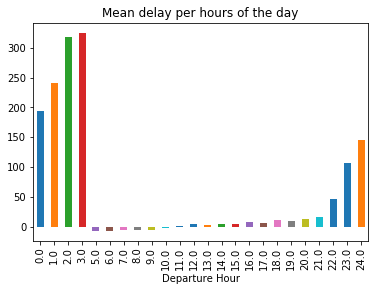

In [272]:

sizes = pd.DataFrame(df.groupby(['DepHour'])['ArrDelay'].mean())
sizes.reset_index(level=0, inplace=True)
sizes.columns = ['Departure Hour','Mean delay']
sizes


sizes.index = sizes['Departure Hour']
sizes['Mean delay'].plot(kind = 'bar',title = 'Mean delay per hours of the day')

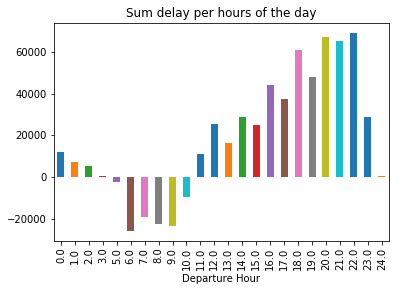

In [273]:
sizes = pd.DataFrame(df.groupby(['DepHour'])['ArrDelay'].sum())
sizes.reset_index(level=0, inplace=True)
sizes.columns = ['Departure Hour','Sum of delay']
sizes


sizes.index = sizes['Departure Hour']
sizes['Sum of delay'].plot(kind = 'bar',title = 'Sum delay per hours of the day')